## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

The dataset contains the data of the customer. On the basis of the data we have to predict the churn rate by the customer. 

The dataset contains the data like 'customerID', 'gender', 'SeniorCitizen','Partner','Dependents, 'tenure','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV, 'Streaming Movies', 'Contact', 'PeperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges' and 'Churn'

Churn rate (sometimes called attrition rate), in its broades sense, is a measure of the number of individuals or items moving out of a collective group over a specific period. It is one of two primary factors that determine the steady-state level of customers a business will support. The term is used in many contexts, but is most widely applied in business with respect to a contractual customer base, for example if businesses with a subscriber-based service model such as mobile telephone networks and pay TV operators. The term is also used to refer to participant turnover in peer to peer networks. Churn rate is an input into customer lifetime value modeling, and can be part of a simulator used to measure return on marketing investment using marketing mix modeling. 

## Importing dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


The dataset contains the details of customers in which both numerical and categorical data are present. Here 'Churn' is the target variable which contains 2 categories so it will be termed as 'Classification problem' where we need to predict the several churn using the classification models. 

If the target variable contains more than 2 categories it will be a Regression problem. If we have a cetegorical data in the target variable is a classification problem and if it is a continuous data than we have a regression. 

In [3]:
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Exploratory Data Analysis (EDA)

In [4]:
# checking the dimension of the dataset 
df.shape

(7043, 21)

The datase contains 7043 rows and 21 columns. Out of which 1 is target variale (label) and remaining 20 are independent variable(features). We have to write the observation to explain to whoever is looking at our project, to understand what whas our thinking and wjy we took that decision. 

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

There are three different types of data (int64, float and object) present in the dataset. 

In [8]:
# checking the null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<AxesSubplot:>

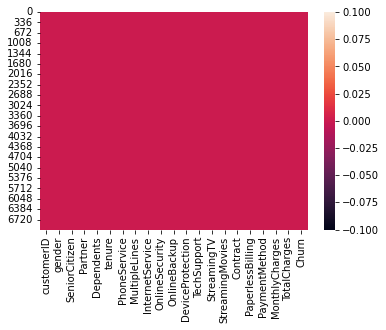

In [10]:
# we can see that is nonull using heatmap
sns.heatmap(df.isnull())

In [11]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [12]:
df['TotalCharges'].nunique()

6531

In [13]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64


Male      3555
Female    3488
Name: gender, dtype: int64


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No         

There are the value counts of all clomuns and we can see blank in TotalCharges columns. Lets check out the unique values of that column. We can see a white space in the TotalCharges repeated for 11 times. 

In [14]:
#checking the unique values of TotalCharges column 
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [15]:
df.shape[0]

7043

We can notice that 'TotalCharges has continuous data but its reflecting as object datatype. And 11 records of this column has blank data. Lets handle this column. 

In [16]:
#checking the space in TotalCharges column 
df.loc[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


by locating the TotalCharges we can find this column has spaces as values but it was showing 0 missing values in this column. Lets fill this column by some values. 

In [17]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
df['TotalCharges'].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

In [18]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
# converting object datatype to float datatype
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

In [20]:
# lests check null values again 
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

When the null values are less you can replace them because it will not affect the data. If there alot of them we should drop them because it will afect the final result of our problem. 

In [21]:
np.mean(df['TotalCharges'])

2283.3004408418697

In [22]:
df.iloc[6670,:]

customerID            4075-WKNIU
gender                    Female
SeniorCitizen                  0
Partner                      Yes
Dependents                   Yes
tenure                         0
PhoneService                 Yes
MultipleLines                Yes
InternetService              DSL
OnlineSecurity                No
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies               No
Contract                Two year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             73.35
TotalCharges                 NaN
Churn                         No
Name: 6670, dtype: object

In [23]:
# checking the mean of TotalCharges column 
print('The mean value of TotalCharges is :', df['TotalCharges'].mean())

The mean value of TotalCharges is : 2283.3004408418697


In [24]:
# filling null values in TotalCharges with its mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

<AxesSubplot:>

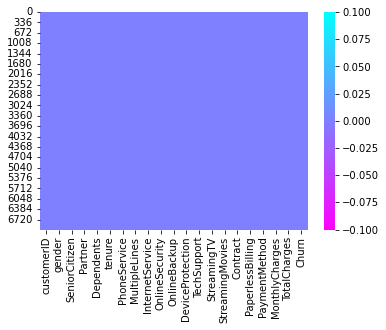

In [25]:
# lets check the null values again
sns.heatmap(df.isnull(), cmap = 'cool_r')

In [26]:
df.iloc[6670,:]

customerID            4075-WKNIU
gender                    Female
SeniorCitizen                  0
Partner                      Yes
Dependents                   Yes
tenure                         0
PhoneService                 Yes
MultipleLines                Yes
InternetService              DSL
OnlineSecurity                No
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies               No
Contract                Two year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             73.35
TotalCharges         2283.300441
Churn                         No
Name: 6670, dtype: object

In [27]:
 # separeting Numerical and Categorical columns 
    
# checking for categorical columns 
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
print('Categorical Columns: ', categorical_col)
print('\n')

# checking for Numerical columns 
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numerical_col.append(i)
print('Numerical Columns: ', numerical_col)

Categorical Columns:  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Numerical Columns:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [28]:
# checking number of unique values in each column 
df.nunique().to_frame('No. of unique values')

,No. of unique values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [29]:
# there are the unique values present in the dataset. Here CustomerIDcolumn has the data set of unique ID to the customers

df.drop('customerID', axis = 1, inplace = True)

In [30]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
#checking the list of counts of targe
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
#the are two categories present in the targe column yes and no
# checking the unique values in target column 
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [33]:
# we can assume that No stands for the customers who have not churned and yes for the costumers that got churned 

### Description of Dataset

In [34]:
#statistical summary of numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


 This gives the statistical information of the numerical columns. The summary of the dataset looks perfect since there is no negative/invalid values present. 
From the above description we can observe the following. 
1. The counts of all the columns are same which means there are no missing values in the dataset. 
2. the mean value is greater than the median 50% in tenure and TotalCharges columns which means the data is skewed to right in these column. 
3. The data in the column MonthlyCharges have mean value less than median which means the data is skewed to left. 
4. By summarazing the data we can observe there is a huge differences between 75% and max hence there are outliers present in the data. 
5. We can also notice the Stadard deviation, min 25% percentile values from the desribe method. 

### Data visualization 

#### Univriate analysis

No     5174
Yes    1869
Name: Churn, dtype: int64


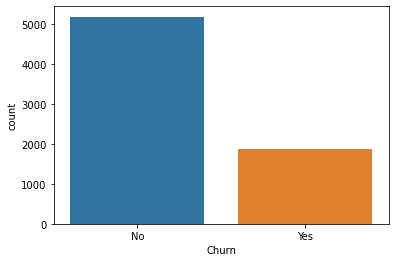

In [35]:
# Visualize the number of Churned customers 
ax = sns.countplot(x='Churn',data = df)
print(df['Churn'].value_counts())

we can observ that the count of 'No churn' is a lot bigger than yes.. Class imbalanced is about a big gap brtween classes in your targed variable. We have to use reasambling technique.

Male      3555
Female    3488
Name: gender, dtype: int64


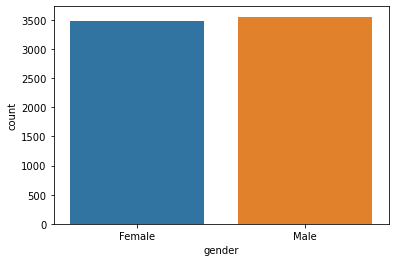

In [36]:
# visualizing the count of Gender 
print(df['gender'].value_counts())
ax = sns.countplot(x = 'gender',data = df)
plt.show()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


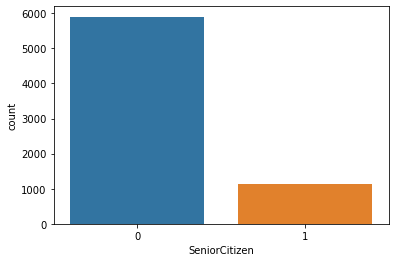

In [37]:
# visualizing the count of Senior Citizen
print(df['SeniorCitizen'].value_counts())
ax = sns.countplot(x='SeniorCitizen',data = df)
plt.show()

Here 0 represents non senior citizens and 1 represents senior citizen. The count of 0 is hight compared with 1 which means the number of non senior citizen are quite high compared to senior citizens data in the dataset. 

No     3641
Yes    3402
Name: Partner, dtype: int64


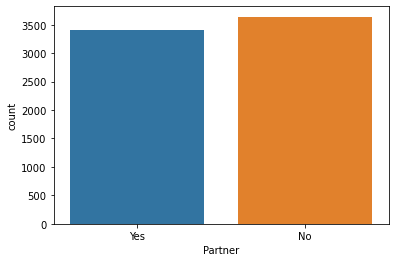

In [38]:
# visualizing the cout of Partener
print(df['Partner'].value_counts())
ax = sns.countplot(x='Partner', data = df)
plt.show()

No     4933
Yes    2110
Name: Dependents, dtype: int64


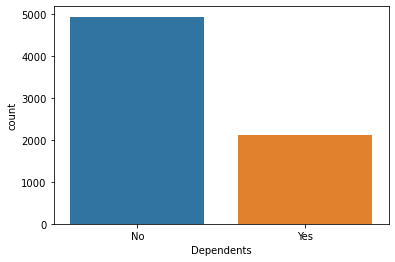

In [39]:
# visualizing the count of Dependents
print(df['Dependents'].value_counts())
ax = sns.countplot(x='Dependents', data = df)
plt.show()

The customers who have dependents are less compared to non dependents

Yes    6361
No      682
Name: PhoneService, dtype: int64


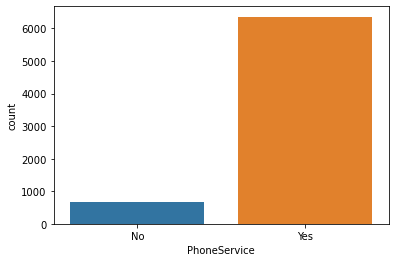

In [40]:
# Visualizing the count of Phone Service
print(df['PhoneService'].value_counts())
ax = sns.countplot(x='PhoneService', data = df)
plt.show()

The customers who have phone services are larger in numbers and who do not own phone services ar very less in number. 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


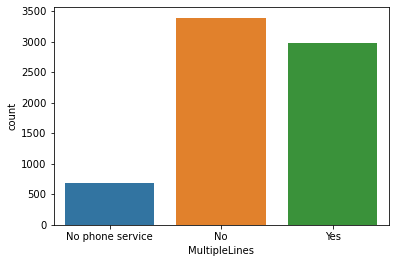

In [41]:
# Visualizing the count of MultipleLines
print(df['MultipleLines'].value_counts())
ax = sns.countplot(x='MultipleLines', data = df)
plt.show()

The customers having phoneservices from single line have high counts compared to the customers having phone services from multiple lines, also the customers who do not have phone services have covered very less data compared to others. 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


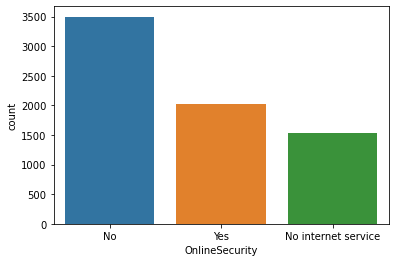

In [42]:
# Visualizing the count of OnlineSecurity
print(df['OnlineSecurity'].value_counts())

ax = sns.countplot(x='OnlineSecurity', data = df)
plt.show()

Customers having no internet services needs online security and who do not own any internet services, they do not need any online security. But from the plot we can observe the majority of customers who have internet services have low online security. 

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


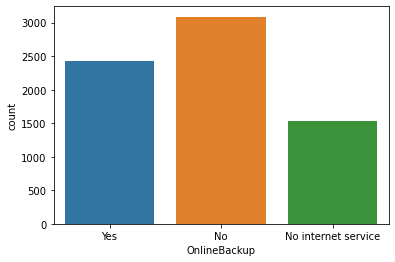

In [43]:
# visualizing how many customers of online backup 

print(df['OnlineBackup'].value_counts())

ax = sns.countplot(x='OnlineBackup', data = df)
plt.show()

We can observe that the customers having no internet services have very less online backup counts compared to others. 

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


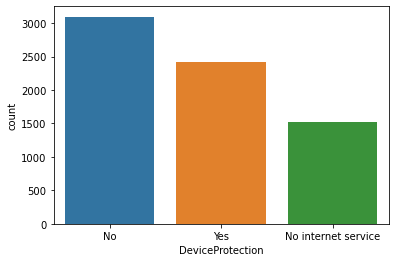

In [44]:
# Visualizing how many customers have Device Protection
print(df['DeviceProtection'].value_counts())

ax = sns.countplot(x = 'DeviceProtection', data = df)
plt.show()

We can see that the customers who do not have internet access, they don't need anu device protection. 

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


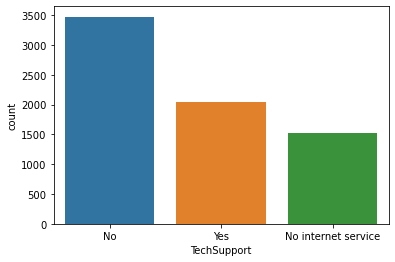

In [45]:
# visualization how many customers needed techsupport 
print(df['TechSupport'].value_counts())

ax = sns.countplot(x = 'TechSupport',data = df)
plt.show()

The customers who do not need any technical support are high in counts compared to the customers who need technical support. 

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


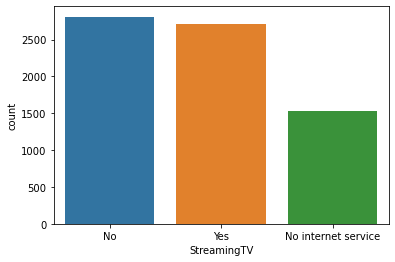

In [46]:
# visualizing how many customers have streamingTV
print(df['StreamingTV'].value_counts())
ax = sns.countplot(x = 'StreamingTV', data = df)
plt.show()

The customers who do not use streaming TV are little bit high in numbers than the customers who do use StreamingTV, and the customers who do not own internet they do nat have this service. 

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


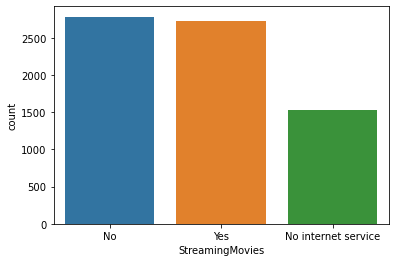

In [47]:
# visualizing how many customers have StreamingMovies
print(df['StreamingMovies'].value_counts())
ax = sns.countplot(x = 'StreamingMovies', data = df)
plt.show()

The cusotemoers who do not have Streaming movies are high in count followed by the customers who have streaming movies services, and the customers that do not have internet services dont have streaming movies services. 

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


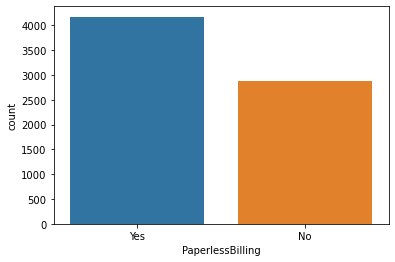

In [48]:
# Visualizing how many customers have PaymentMethod
print(df['PaperlessBilling'].value_counts())

ax = sns.countplot(x='PaperlessBilling', data=df)
plt.show()

Most of the customers prefer paper billing and avarage number of customers who do not prefer paper less billing, they may like to recive paper billing. 

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


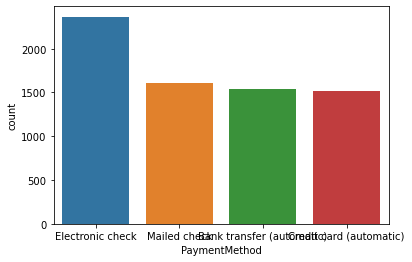

In [49]:
# Visualizing the count of paymentmethod
print(df['PaymentMethod'].value_counts())
ax = sns.countplot(x = 'PaymentMethod', data = df)

plt.show()

Most customers prefer Electronic Check payment moethod and the customers who prefer mailed check bank transfer and credit card are more or less in the same amount. 

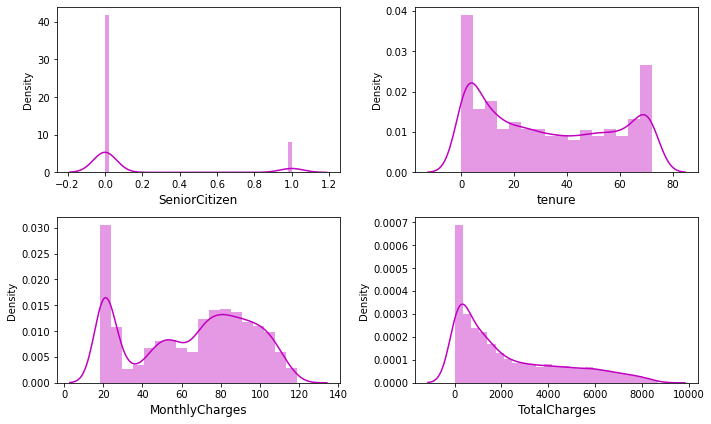

In [50]:
#lets check how the data has been distributed in remaining column 

plt.figure(figsize = (10,6), facecolor = 'white')
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[col], color = 'm')
        plt.xlabel(col, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber +=1
plt.tight_layout()

From the above distribution plot we can notice that the data almost looks normal in all the columns except SeniorCitizen. and the data in the column TotalCharges is skewed to the right. Other two columns tenure and MonthlyCharges do not have skewness. 

### Bivariate analysis 

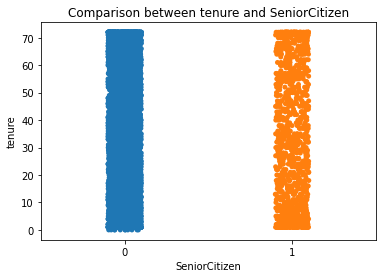

In [51]:
#comparing tenure and Senior Citizen

plt.title('Comparison between tenure and SeniorCitizen')
sns.stripplot(x = 'SeniorCitizen', y = 'tenure', data = df)
plt.show()

There is no significant difference between the features, here the features are in equal lenght. 

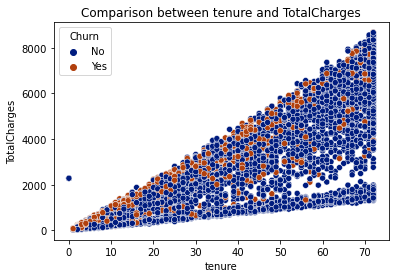

In [52]:
# Comparing tenure and Total Charges
plt.title('Comparison between tenure and TotalCharges')
sns.scatterplot(x = 'tenure', y  = 'TotalCharges', data = df, hue = 'Churn', palette = 'dark')
plt.show()

Here we can notice the stron linear relation between the features
As the tenure increases, TotalCharges also increase rapidly. If the customers have low tenure services than there is hice chance of churn. If the tenure is high the customers didnt leave the company. 

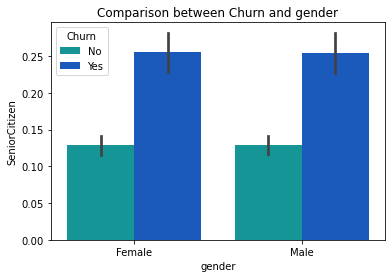

In [53]:
# comparing gender and senior Citizen on the basis of Churn

plt.title('Comparison between Churn and gender')
sns.barplot(x = 'gender', y = 'SeniorCitizen', data = df, palette = 'winter_r', hue = 'Churn')
plt.show()

There is no significant difference between the columns. The customers churns remains unaffected in gender and SeniorCitizen case. 

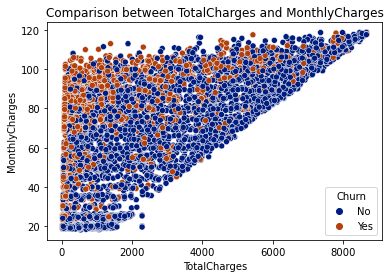

In [54]:
#comparing Total Charges and MonthlyCharges 
plt.title('Comparison between TotalCharges and MonthlyCharges')
sns.scatterplot(x= 'TotalCharges', y = 'MonthlyCharges', data = df, hue = 'Churn', palette = 'dark')
plt.show()

There is a linear relationship between the features. The customers with high monthly charges have high tendency to stop the services since they have charges. Also if the customers are ready to contribute with the monthly charges then there is an increment in the total charges. 

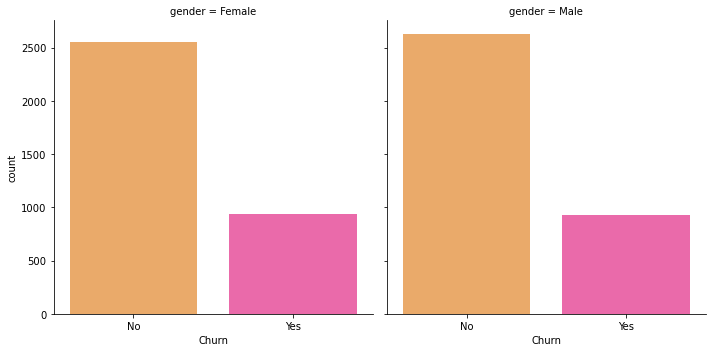

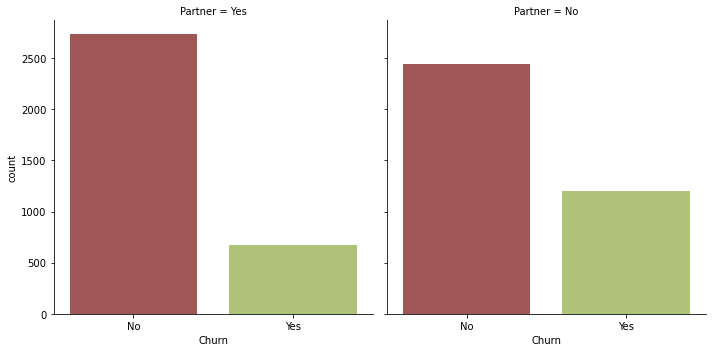

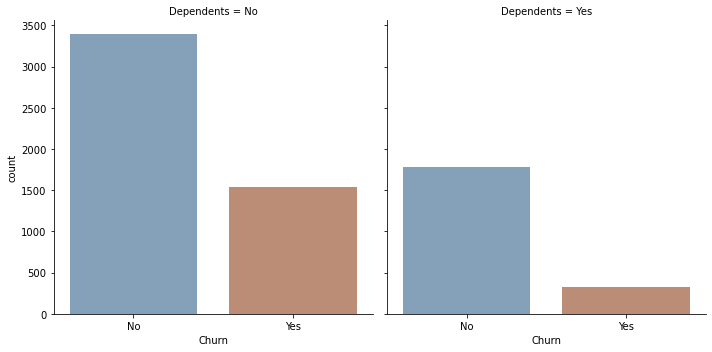

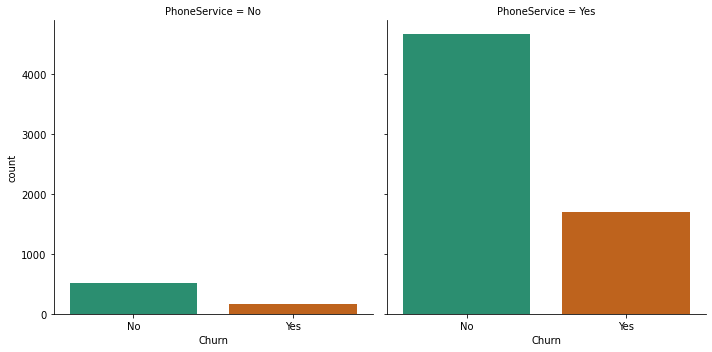

In [55]:
# Checking Chrun level and gender
sns.catplot(x = 'Churn', col = 'gender', data = df, palette = 'spring_r', kind = 'count')

# Checking Churn level and Partner 
sns.catplot(x = 'Churn', col = 'Partner', data = df, palette = 'tab20b_r', kind = 'count')

# Checking Churn level and Dependents
sns.catplot(x='Churn', col = 'Dependents', data= df, palette = 'twilight_shifted', kind = 'count')

# Checking Churn level and PhoneService
sns.catplot(x = 'Churn', col = 'PhoneService', data = df, palette = 'Dark2', kind = 'count')
plt.show()

1. In the first plot we can see there is no significant difference in the genders, both the gender have equal churn lvl. 
2.  In the Second plot we can see the customers without partners have high churn rate compared to the customers with partners. 
3. The customers who do not have any dependency have high churn rate comared to the customers who have depedents. 
4. In the last plot we can notice the customers who have phone service have high tendency of getting churned. 

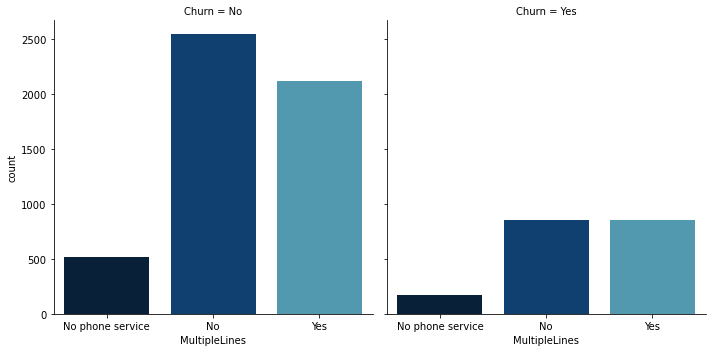

In [56]:
# Checking Churn lvl and MultipleLines
sns.catplot(x = 'MultipleLines', col = 'Churn', data = df, palette = 'ocean', kind = 'count')
plt.show()

The customers who have phone services from single line have high churn rate compared to the customers having phone services from multiple lines, also, there are very less of customers who do no thave phone services. 

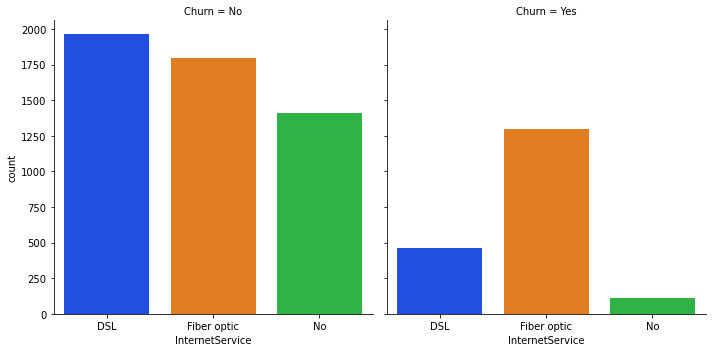

In [57]:
#Checking Chrun lvl and Internet services
sns.catplot(x= 'InternetService', col = 'Churn', palette = 'bright', kind='count', data = df)
plt.show()

The ratio of churn is high when the customers prefer fiber optic internet services compared to other services, may be this type of service is bad and need to be focused on. And the customers who own DSL service they have very less churn rate. 

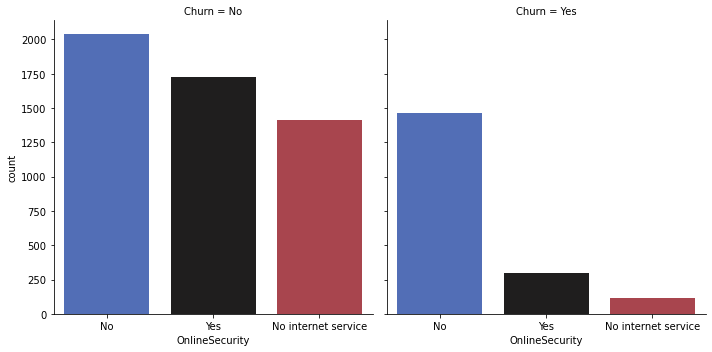

In [58]:
# Checking Churn lvl on OnlineSecurity
sns.catplot(x='OnlineSecurity', col='Churn', data = df, palette = 'icefire', kind='count')
plt.show()

The customers who have no internet services have very less churn rate and the customers who do not have online security services have high tendency of getting churned. 

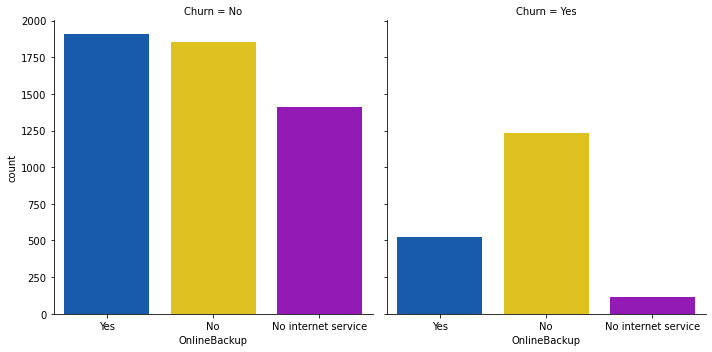

In [59]:
# Checking Churn lvl in OnlineBackup
sns.catplot(x='OnlineBackup', col ='Churn', data = df, palette='prism', kind = 'count')
plt.show()

It also same as in the case of online security. It is obvious that the customers who do not have internet services they do not need any online backup. The customers who do not have online backup services have high churn rate. 

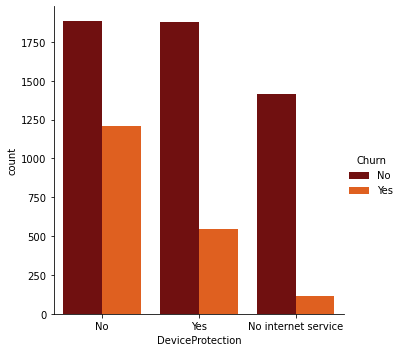

In [60]:
# Checking Churn level in DeviceProtection
sns.catplot(x ='DeviceProtection', hue = 'Churn', palette = 'gist_heat', kind = 'count', data=df)
plt.show()

The customers who do not own any Device protection have very high churn rate compared to others. 

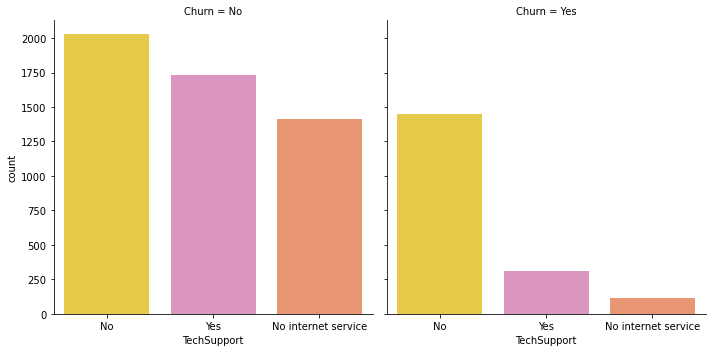

In [61]:
# Checking Churn level in TechSupport
sns.catplot(x='TechSupport', col = 'Churn', palette = 'Set2_r', kind = 'count', data=df)
plt.show()

Here we can clearly see that the customers who do not have any techsupport then they have high churn ratio

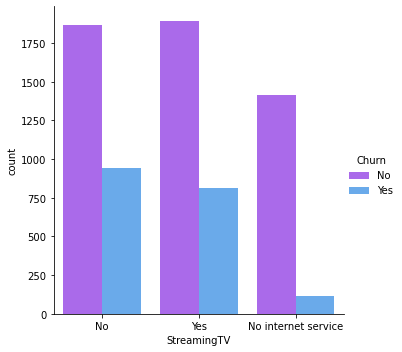

In [62]:
# Checking Churn lvl in StreamingTV
sns.catplot(x='StreamingTV', hue='Churn', palette = 'cool_r', kind='count', data=df)
plt.show()

The churn rate is nearly same if the customers own StreamingTV or not.

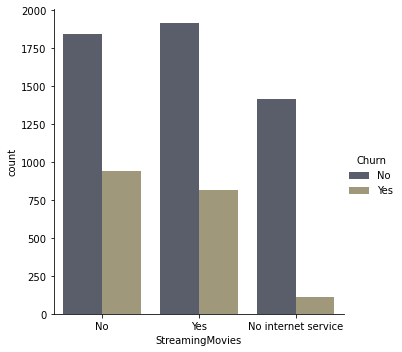

In [63]:
# Checking Churn lvl in StreamingMovies
sns.catplot(x='StreamingMovies', hue = 'Churn', palette = 'cividis', kind='count', data=df)
plt.show()

The customers who are existing in the company they do not own StreaingMovies in their devices, and the churn rate is low when the customers do not hae internet services. 

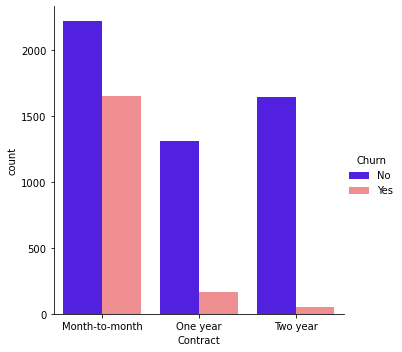

In [64]:
#Checking Churn lvl in Contract
sns.catplot(x='Contract', hue='Churn', palette ='gnuplot2', kind='count', data=df)
plt.show()

The customers who have churned are mostly having moth to moth contract

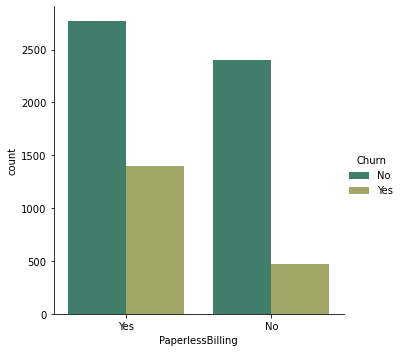

In [65]:
#Checking Churn lvl in PaperlessBilling
sns.catplot(x='PaperlessBilling', hue ='Churn', palette='gist_earth',kind='count', data=df)
plt.show()

The customers who prefer paperlessbilling htey have high churn rate.

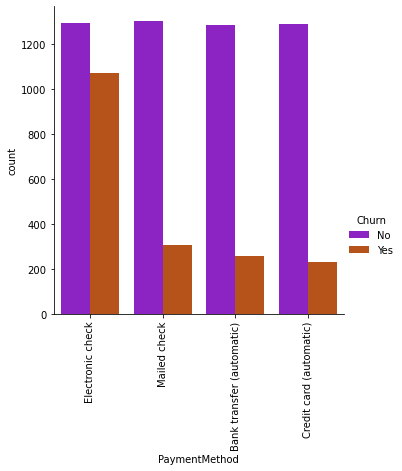

In [66]:
# Checking Churn lvl in PaymentMethod
sns.catplot(x='PaymentMethod', hue='Churn', palette='gnuplot', kind='count', data=df)
plt.xticks(rotation=90)
plt.show()

The customers who prefer Electronic check have high churn rate also the customers who exist in the company uses equal payment method. 

### Multivariate Analysis

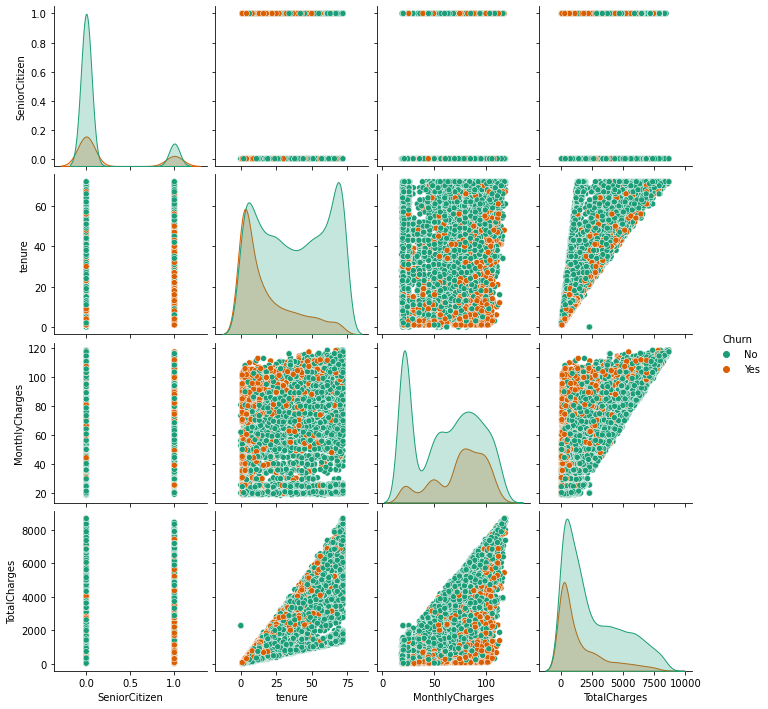

In [67]:
sns.pairplot(df, hue = 'Churn', palette = 'Dark2')
plt.show()

1. The pairplot gives the pairwise relation between the features ont he basis of the target 'Churn'. On the diagonal we can notice the distribution plots. 
2. The features tenure and TotalCharges, MonthlyCharges and TotalCharges have strong linear relation with each other. 
3. There are no outliners in any of the columns but lets plot box to indetify the outliers. 

## Checking for outliers

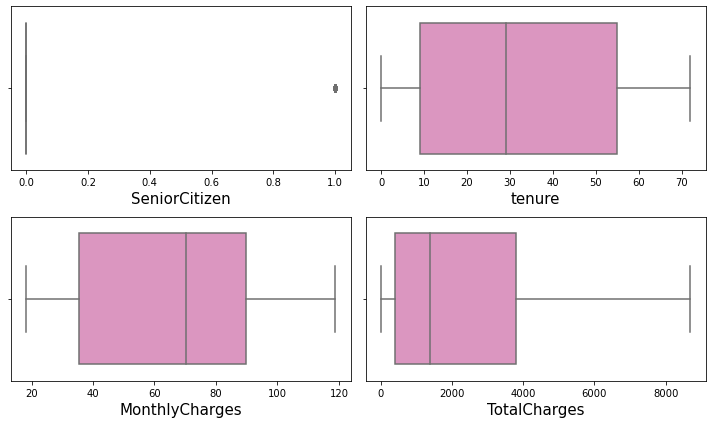

In [68]:
# Lets check the outliers by plotting boxplot. 
plt.figure(figsize = (10, 6), facecolor = 'white')
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],palette = 'Set2_r')
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

The column SeniorCitizen has outliers but it contains categorical data so no need to remove outliers. Apart from this none of the columns have outliers. 

### Checking for skewness

In [69]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

The columns SeniorCitizen and TotalCharges have skweness in the data. Since SeniorCitizen is categorical no need to remove skewness. Since TotalCharges is continuous in natures, lets use cube root method to remove skewness. The acceptable skewness is between -0.5 and 0.5 but it dependes on the range of our data. 

### Removing skewness

In [70]:
# Removing skewness using cuberoot method
df['TotalCharges']=np.cbrt(df['TotalCharges'])

we have removed the skewness using cube root method 

In [71]:
# Checking skewness again
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.011168
dtype: float64

we can see the skewness has been reduced in TotalCharges column. 

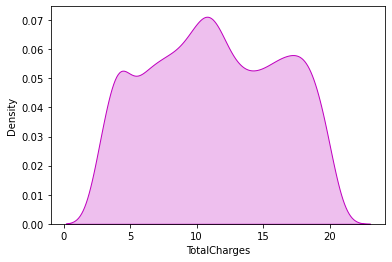

In [72]:
# Lets visualize how the data has been distrivuted in TotalCharges after removing skewness
sns.distplot(df['TotalCharges'], color = 'm', kde_kws = {'shade':True}, hist = False)
plt.show()

This looks almost normal and skewness is also removed. 

## Encoding categorical columns

In [73]:
# encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,12.579230,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,19.454331,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,7.023391,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,6.743066,1.0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null   float64


We have converted the categorical column in continous column using Ordinal Encoding method. 

In [75]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,11.358079,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,4.896177,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.659006,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,7.381699,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,11.188354,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,15.586542,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,20.555116,1.000000


After encoding the categorical columns we can see all column details here. The counts of all the columns are same that means no null values in the dataset. This describe method describe the count, mean, std, min, IQR and max values of all the columns. 

## Correlation between target variable and indep variable. 

In [76]:
# Checking the correlation between features and target 
cor = df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.001975,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106261,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.343924,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.085055,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.868383,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.087944,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.461995,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.206969,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.246368,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.351488,-0.195525


This gives the correlation between the dependent and independent variables. We can visualize this by plotting heatmap. 

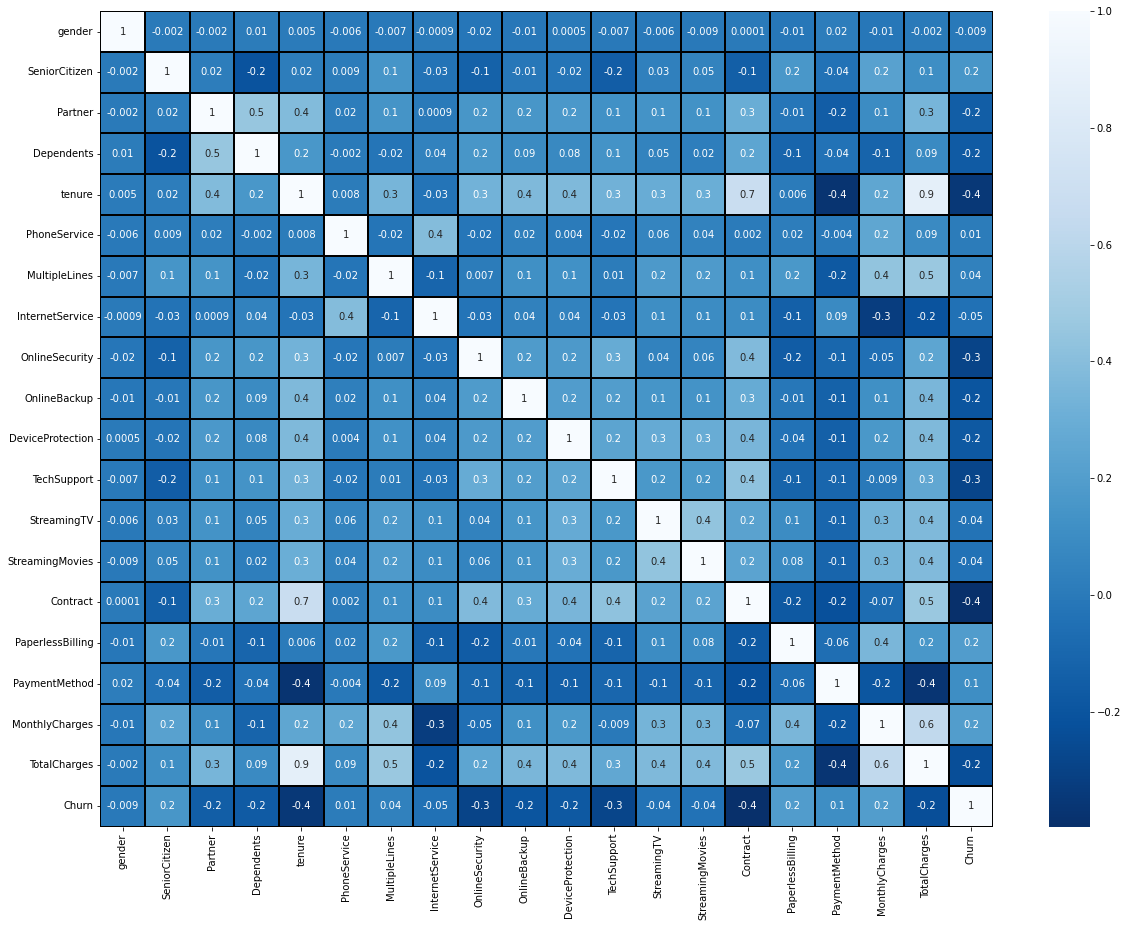

In [77]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = '.1g', linecolor = 'black', annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0);
plt.show()

In [78]:
# 0 - no relation, -0.3 to 0.3 - less corelation, greater than -0.5 or 0.5 moderate correlation, greater than -0.7 and 0.7 high correlation

This heatmap shows the correlation matrix by visualaizing the data. We can observe the relation between feature to feature and feature to label. This heatmap contains both positive and negative correlation. 
1. There is no much positive correlation between the target and features. 
2. The column MontlyCharges, PaperlessBilling, SeniorCitizen, and PaymentMethod have positive correlation with the Label Column Churn.
3. The label is negatively correlated with Contract, tenure, OnlineSecurity, TechSupport, TotalCharges, DeviceProtection, OnlineBackup, Partner and Dependets. 
4. Also the column gender has very less correlation with the label, we can drop it if necessary. 
5. The column TotalCharges and tenure, Contract and tenure, TotalCharges and MonthlyCharges and many others columns have high correlation with each other. 

In [79]:
cor['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.233781
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

We can observe the positive and negative correlated features with the target. 

## Visualizing the correlation between label and features using bar plot. 

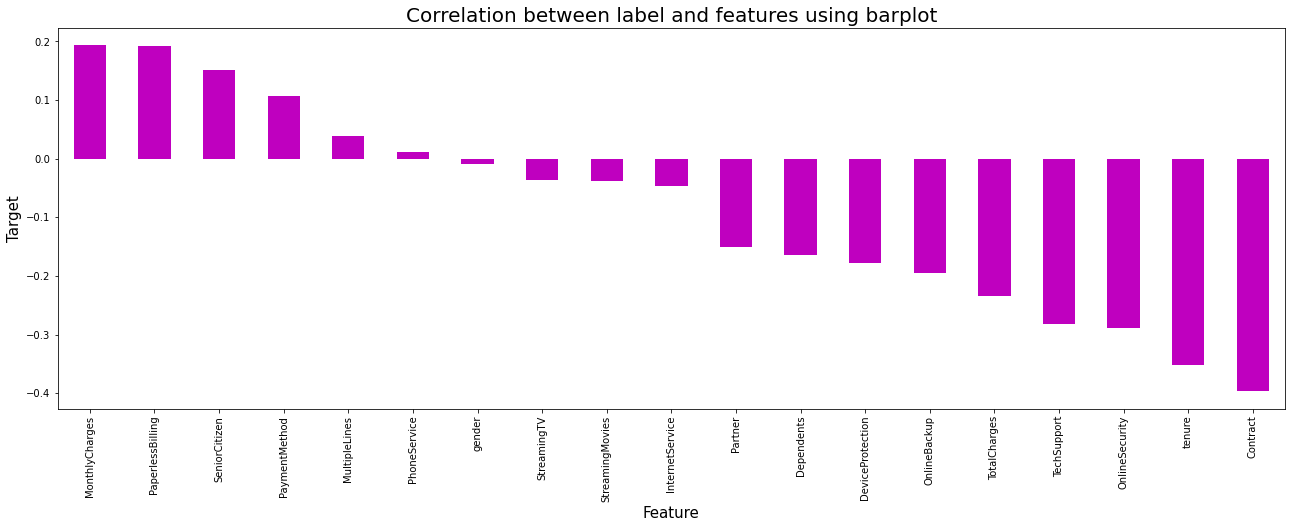

In [80]:
plt.figure(figsize = (22, 7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar', color='m')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title('Correlation between label and features using barplot', fontsize = 20)
plt.show()

From the above bar plot we can notice the positive and negative correlation between the features and the target. Here the featres gender and PhoneService have very less correlation with the column. 

## Separating features and label

In [81]:
x = df.drop('Churn', axis = 1)
y = df['Churn']

### Feature scaling using Standard Scalarization

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x # we use this so the model dont prioritize any feature and everyone have the same impact in the model. 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.686340
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205213
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346794
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183306
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.249427
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.653704
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.885384
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.942642


We have scaled the data using Standard Scalarization method to overcome the issue of biasness.

## Checking Variance inflation Factor(VIF)

In [83]:
# Finding variance inflation factor in each scaled column 

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values, i)
                for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,1.001696,gender
1,1.149704,SeniorCitizen
2,1.462974,Partner
3,1.383950,Dependents
4,12.357252,tenure
5,1.622391,PhoneService
6,1.398354,MultipleLines
7,1.870013,InternetService
8,1.256219,OnlineSecurity
9,1.192694,OnlineBackup


By checking VIF values we can find the features causing multicoliniarity problem. Here we can find the feature TotalCharges and tenure have VIF value greater than ten which mean they have high correlation with other features. We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF. 

In [84]:
# droping TotalCharges column

x.drop('TotalCharges', axis = 1, inplace = True)

In [85]:
# again we check VIF value to confirm whether the multicollinearity still exists or not
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values, i)
                    for i in range (len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


So, we have solved the problem of multicolinearity. We can now move ahead for model building. 

In [86]:
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

Here we can see that the data is not balanced, since it is a classification problem we will balance the data using oversampling method. 

### Oversampling

In [87]:
# oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [88]:
# Checking value count fo target column 
y.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

We have to balance our data because then the model will learn uneaven about the biggest class and less about the small one. 9Smote, randomoversalbpling, oversamplig. We are balancing the class so the amout of the data given to my model is equal. If its not the model will learn more about one class than another and will afect my performance. 

In [89]:
""""import the libraries
do non graphical analysis
graphical analysis 
    univariate analysis
    bivariate analysis
    multivariate analysis
encode the categorical columns
check outliers and remove it if present
check skewness and remove it if present
check multicollinearity
remove multicollinearity if present
apply feaures scaling methods on numerical features 
apply resampling methods to balance the calsses(in classification problem)

also apply feature selection methods """""

'"import the libraries\ndo non graphical analysis\ngraphical analysis \n    univariate analysis\n    bivariate analysis\n    multivariate analysis\nencode the categorical columns\ncheck outliers and remove it if present\ncheck skewness and remove it if present\ncheck multicollinearity\nremove multicollinearity if present\napply feaures scaling methods on numerical features \napply resampling methods to balance the calsses(in classification problem)\n\nalso apply feature selection methods '

Now the data is balanced. Now we can build machine learning classification models. 

## Modeling

### Finding the best random state

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0 
maxRS = 0
for i in range(1,200): # we can take any rainge
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print ('Best accuracy is', maxAccu, 'at random_State', maxRS)

Best accuracy is 0.8640901771336554 at random_State 79


The best accuracy is 86.6% at random_state 79

### Creating train test split

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRS)

## Classification Algorithms

In [92]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

### RandomForestClassifier

In [93]:
c

0.8608695652173913
[[1337  211]
 [ 221 1336]]
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      1548
         1.0       0.86      0.86      0.86      1557

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



The accuracy for this model is 86%

### Logistic Regression

In [94]:
# Checking the accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.7880837359098228
[[1162  386]
 [ 272 1285]]
              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78      1548
         1.0       0.77      0.83      0.80      1557

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



The accuracy for this model is 78%.

### Support Vector Machine Classifier 

In [95]:
# Checking accuracy for Support Vector Machine Classifier 

svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.8183574879227054
[[1213  335]
 [ 229 1328]]
              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81      1548
         1.0       0.80      0.85      0.82      1557

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



The accuracy for this model is 82.35%

### Bagging Classifier 

In [96]:
# Checking accuracy for Bagging Classifier 
BC= BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test, predBC))

0.8273752012882448
[[1312  236]
 [ 300 1257]]
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83      1548
         1.0       0.84      0.81      0.82      1557

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



The accuracy_score for BaggingClassifier is 83.47.

### ExtraTreesClassifier 

In [97]:
#Checking accuracy for ExtraTreesClassifier 
ET= ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.8608695652173913
[[1327  221]
 [ 211 1346]]
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      1548
         1.0       0.86      0.86      0.86      1557

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



The accuracy_score using ExtraTreesClassifier is 86.6%.

### Gradient Boosting Classifier 

In [98]:
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.8508856682769727
[[1272  276]
 [ 187 1370]]
              precision    recall  f1-score   support

         0.0       0.87      0.82      0.85      1548
         1.0       0.83      0.88      0.86      1557

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



The accuracy for Gradient Boosting Classifier is 85.15%

### AdaBoost Classifer

In [99]:
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.8257648953301128
[[1220  328]
 [ 213 1344]]
              precision    recall  f1-score   support

         0.0       0.85      0.79      0.82      1548
         1.0       0.80      0.86      0.83      1557

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



The accuracy for AdaBoost Classifer is 83.25%

### Cross Validation Score 

In [100]:
from sklearn.model_selection import cross_val_score

cv = 5--- its a fold value 1, 2, 3, 4, 5,
cross_val_score(modelname, features, targetvariable, cv = foldvalue, scoring = 'accuracy')
in classification arlgorithms - default scoring parameter - accuracy
for regression default scoring parameter is r2 score

In [101]:
# Checking cv score for RFC
score = cross_val_score(RFC, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -', accuracy_score(y_test, predRFC) - score.mean())

[0.77342995 0.78743961 0.89468599 0.89801837 0.91348478]
0.8534117394339724
Difference between Accuracy score and cross validation score is - 0.007457825783418914


In [102]:
# Checking cv score for LR
score = cross_val_score(LR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -', accuracy_score(y_test, predLR) - score.mean())

[0.7705314  0.75797101 0.76231884 0.78250362 0.78540358]
0.7717456915170576
Difference between Accuracy score and cross validation score is - 0.016338044392765205


In [103]:
# Checking cv score for SVC
score = cross_val_score(svc, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -', accuracy_score(y_test, predsvc) - score.mean())

[0.7821256  0.77101449 0.80483092 0.82310295 0.82938618]
0.8020920279348001
Difference between Accuracy score and cross validation score is - 0.016265459987905295


In [104]:
# Checking cv score for BC
score = cross_val_score(BC, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -', accuracy_score(y_test, predBC) - score.mean())

[0.73574879 0.75458937 0.87246377 0.89028516 0.89318511]
0.8292544415725116
Difference between Accuracy score and cross validation score is - -0.001879240284266781


In [105]:
# Checking cv score for ET
score = cross_val_score(ET, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -', accuracy_score(y_test, predET) - score.mean())

[0.80531401 0.80531401 0.90048309 0.90430159 0.90285162]
0.8636528650448418
Difference between Accuracy score and cross validation score is - -0.002783299827450514


In [106]:
# Checking cv score for GB
score = cross_val_score(GB, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -', accuracy_score(y_test, predGB) - score.mean())

[0.74879227 0.78067633 0.87101449 0.88303528 0.88690188]
0.8340840519002622
Difference between Accuracy score and cross validation score is - 0.016801616376710404


In [107]:
# Checking cv score for ABC
score = cross_val_score(ABC, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -', accuracy_score(y_test, predABC) - score.mean())

[0.76618357 0.77536232 0.81835749 0.83856936 0.85065249]
0.8098250455890147
Difference between Accuracy score and cross validation score is - 0.015939849741098078


Extra trees calssifier is our best model as the difference between accuracy score and cross validation score is min. 

### Extra trees Classifier is our best model

## Hyper Parameter tuning

In [108]:
# ExtraTreesClassifier 
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [10,20,30],
              'random_state':[10, 50, 1000],
              'n_jobs':[-2,-1,1],
              'n_estimators':[50,100,200,300]}

In [109]:
GCV= GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5)

In [110]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [111]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 1000}

In [127]:
Final_model = ExtraTreesClassifier(criterion = 'entropy', max_depth = 20, n_estimators = 100 , n_jobs = -4, random_state = 50)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

87.11755233494364


## Plotting ROC and compare AUC for all the models used

In [128]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve # this is only for binary 

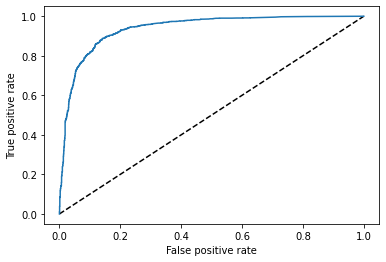

Auc Score:  
 0.8711165628594046


In [129]:
y_pred_prob = Final_model.predict_proba(x_test)[:,1] # we choose one of the two classes
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob) # false positive rate and true positive rate
roc_auc = auc(fpr, tpr) # 

plt.plot([0,1],[0,1],'k--') # k is about the line tipe 
plt.plot(fpr, tpr, label = 'Random Forest Classifier(area=%0.2f)'% roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
auc_score = roc_auc_score(y_test, Final_model.predict(x_test))
print('Auc Score: ','\n', auc_score)

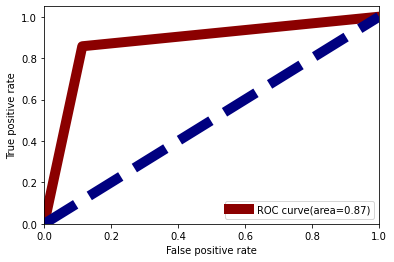

In [134]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'darkred', lw = 10, label = 'ROC curve(area=%0.2f)'% roc_auc) # the % 

plt.plot([0,1],[0,1], color ='navy', lw = 10, ls = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 88%.

### Saving the model 

In [135]:
import joblib
joblib.dump(Final_model, 'Telecom_Customer_Churn_Analysis.pkl')

['Telecom_Customer_Churn_Analysis.pkl']

### Predictin the saved model

In [136]:
# lets load the saved model and get the predictions
model = joblib.load('Telecom_Customer_Churn_Analysis.pkl')

# prediction
prediction = model.predict(x_test)
prediction

array([1., 1., 1., ..., 1., 1., 0.])

These are predicted churned values of the customers. 

In [137]:
a = np.array(y_test) # this is to convert y_test intro array
df = pd.DataFrame({'Predicted':prediction,'Orignial':a})
df

,Predicted,Orignial
0,1.0,1.0
1,1.0,1.0
2,1.0,0.0
3,1.0,1.0
4,0.0,0.0
...,...,...
3100,1.0,1.0
3101,0.0,1.0
3102,1.0,1.0
3103,1.0,1.0


In [138]:
conclusion = pd.DataFrame([model.predict(x_test)[:]], index = ['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,3095,3096,3097,3098,3099,3100,3101,3102,3103,3104
Predicted,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
Original,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
